# <font style="color:blue">Project 2: Kaggle Competition - Classification</font>

#### Maximum Points: 100

<div>
    <table>
        <tr><td><h3>Sr. no.</h3></td> <td><h3>Section</h3></td> <td><h3>Points</h3></td> </tr>
        <tr><td><h3>1</h3></td> <td><h3>Data Loader</h3></td> <td><h3>10</h3></td> </tr>
        <tr><td><h3>2</h3></td> <td><h3>Configuration</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>3</h3></td> <td><h3>Evaluation Metric</h3></td> <td><h3>10</h3></td> </tr>
        <tr><td><h3>4</h3></td> <td><h3>Train and Validation</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>5</h3></td> <td><h3>Model</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>6</h3></td> <td><h3>Utils</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>7</h3></td> <td><h3>Experiment</h3></td><td><h3>5</h3></td> </tr>
        <tr><td><h3>8</h3></td> <td><h3>TensorBoard Log</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>9</h3></td> <td><h3>Kaggle Profile Link</h3></td> <td><h3>50</h3></td> </tr>
    </table>
</div>


## <font style="color:green">Download the trainer pack</font>

In [1]:
!wget "https://raw.githubusercontent.com/RadimKozl/OpenCV_PyTorch_Project2/refs/heads/main/trainer.zip" -O ./trainer.zip

!ls /kaggle/working/

!unzip /kaggle/working/trainer.zip

!rm /kaggle/working/trainer.zip

--2024-10-18 08:52:13--  https://raw.githubusercontent.com/RadimKozl/OpenCV_PyTorch_Project2/refs/heads/main/trainer.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18793 (18K) [application/zip]
Saving to: './trainer.zip'

./trainer.zip       100%[===================>]  18.35K  --.-KB/s    in 0.003s  

2024-10-18 08:52:14 (5.13 MB/s) - './trainer.zip' saved [18793/18793]

trainer.zip
Archive:  /kaggle/working/trainer.zip
   creating: trainer/.ipynb_checkpoints/
  inflating: trainer/.ipynb_checkpoints/base_metric-checkpoint.ipynb  
  inflating: trainer/.ipynb_checkpoints/base_metric-checkpoint.py  
  inflating: trainer/.ipynb_checkpoints/configuration-checkpoint.py  
  inflating: trainer/.ipynb_checkpoints/hooks-checkpoint.py  
  inflating: trainer/.ipynb

## <font style="color:green">Imports</font>

In [2]:
%matplotlib inline


import os
import json
import yaml
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import IPython
from PIL import Image

from operator import itemgetter
import multiprocessing as mp
mp.set_start_method('spawn', force=True)

import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import Dataset
from torchvision.transforms import functional as F

from torchvision import datasets, transforms
from torch.optim.lr_scheduler import MultiStepLR

torch.multiprocessing.set_start_method('spawn', force=True)

import torchvision.models as models


from trainer import Trainer, hooks, configuration
from trainer.utils import setup_system, patch_configs
from trainer.metrics import AccuracyEstimator
from trainer.tensorboard_visualizer import TensorBoardVisualizer, ModelVisualizer, DataEmbedingVisualizer
from trainer.tensorboard_visualizer import set_writer
from trainer.custom_dataloader import JsonClassificationDataset
from trainer.configuration import load_config_from_yaml


## <font style="color:green">Start TensorBoard by Ngrog tunnel</font>
<a href="https://ngrok.com/">Ngrog tunnel</a>

In [3]:
!tensorboard --version

2.16.2


In [4]:
!wget https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.tgz
!tar xf ./ngrok-v3-stable-linux-amd64.tgz -C /usr/local/bin

--2024-10-18 08:52:46--  https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.tgz
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 52.202.168.65, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9088051 (8.7M) [application/octet-stream]
Saving to: 'ngrok-v3-stable-linux-amd64.tgz'

ngrok-v3-stable-lin 100%[===================>]   8.67M  4.76MB/s    in 1.8s    

2024-10-18 08:52:49 (4.76 MB/s) - 'ngrok-v3-stable-linux-amd64.tgz' saved [9088051/9088051]



**Add to the console:**

```cmd
!ngrok authtoken <authtoken> # /root/.config/ngrok/ngrok.yml

```

In [6]:
pool = mp.Pool(processes = 10)
results_of_processes = [pool.apply_async(os.system, args=(cmd, ), callback = None )
                        for cmd in [
                        f"tensorboard --logdir /kaggle/working/log_resnet18 --load_fast=false --host 0.0.0.0 --port 6006 &",
                        "/usr/local/bin/ngrok http 6006 &"
                        ]]

In [7]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://f8a2-35-234-56-172.ngrok-free.app


## <font style="color:green">1. Data Loader [10 Points]</font>

In this section, you have to write a class or methods, which will be used to get training and validation data loader.

You need to write a custom dataset class to load data.

**Note; There is   no separate validation data. , You will thus have to create your own validation set, by dividing the train data into train and validation data. Usually, we do 80:20 ratio for train and validation, respectively.**


### <font style="color:blue">Class for create JSON file of datasets</font>

We create Json structure of `train`, `valid` and `test` datasets, for creating PyTorch Dataloader a standard module of `trainer`.

In [8]:
class Transform_dataset:
    def __init__(self, root_dir, save_dir, name_json_file = 'datasets.json', ratio_split_value = 80):
        self.root_dir = root_dir
        self.save_dir = save_dir
        self.name_json_file = name_json_file
        self.ratio_split_value = ratio_split_value
        self.dir_image = os.path.join(self.root_dir, 'images', 'images')
        self.train_file = os.path.join(self.root_dir, 'train.csv')
        self.test_file = os.path.join(self.root_dir, 'test.csv')
        self.sample_file = os.path.join(self.root_dir, 'sample_submission.csv')
        self.json_file = os.path.join(self.save_dir, self.name_json_file)
        self.temp_train_file = os.path.join(self.save_dir,'temp_train.csv')
        self.temp_valid_file = os.path.join(self.save_dir, 'temp_valid.csv')
        self.temp_test_file = os.path.join(self.save_dir, 'temp_test.csv')
        self.dict_name_class = {}
        self.unique_classes_train = None
        
    def __get_file_paths(self, directory):
        file_paths = []
        
        for root, _, files in os.walk(directory):
            for file in files:
                file_path = os.path.join(root, file)
                file_paths.append(file_path)
        return file_paths

    def __selest_class_id(self):
        train_values = pd.read_csv(self.train_file)

        class_counts_train = train_values['class'].value_counts()
        self.unique_classes_train = class_counts_train.index.tolist()
        self.unique_classes_train.sort()
       
        
        for name in self.unique_classes_train:
            self.dict_name_class[name] = int(self.unique_classes_train.index(name))

    def __train_test_split(self):
        # Load data from CSV file
        data = pd.read_csv(self.train_file)
    
        # set value for split data
        value_split = round(self.ratio_split_value/100, 2)
        
        # Get number of rows
        num_rows = len(data)
        
        # Calculate number of index of test/train data
        train_size = int(value_split * num_rows)  # 80% for training
        test_size = num_rows - train_size
        
    
        # Random index reordering
        indices = np.random.permutation(num_rows)
        train_indices = indices[:train_size]
        test_indices = indices[train_size:]
        
        # Create training and test set using indexes
        train_data = data.iloc[train_indices]
        test_data = data.iloc[test_indices]
        
        # Save split data to new CSV files
        train_data.to_csv(self.temp_train_file, index=False)
        test_data.to_csv(self.temp_valid_file, index=False) 

    def __get_image_shape(self, image_path):
        img = Image.open(image_path)
        w, h = img.size
        c =  img.mode
        cc = ''
        if c == 'RGB':
            cc = 'RGB'
        elif c == 'RGBA':
            cc = 'RGBA'
        elif c == 'L':
            cc = 'Grayscale'
        elif c == '1':
            cc = 'Grayscale'
        else:
            cc = c
        return (w, h, c)

    def __correct_test_file(self):
        table_1 = pd.read_csv(self.test_file)
        table_2 = pd.read_csv(self.sample_file)
        table_test_data = pd.merge(table_1, table_2, on='id', how='left')
        table_test_data.to_csv(self.temp_test_file, index=False)

    def __remove_temp_files(self):
        os.remove(self.temp_train_file)
        os.remove(self.temp_valid_file)
        os.remove(self.temp_test_file)

    def process_json(self):
        self.__train_test_split()
        self.__correct_test_file()
        self.__selest_class_id()

        table_train = pd.read_csv(self.temp_train_file) # load csv file of train data
        table_valid = pd.read_csv(self.temp_valid_file) # load csv file of valid data
        table_test = pd.read_csv(self.temp_test_file) # load csv file of test data

        # add type data selection
        table_train['type_dataset'] = 'train'
        table_valid['type_dataset'] = 'valid'
        table_test['type_dataset'] = 'test'

        # add all data together
        df_concat_1 = pd.concat([table_train, table_valid], axis=0)
        df_concat_2 = pd.concat([df_concat_1, table_test], axis=0)

        df_concat_2['class_idx'] = df_concat_2['class'].map(self.dict_name_class)

        list_path_image = self.__get_file_paths(self.dir_image) # load path of images 

        # create table of path images
        list_id = []
        list_paths = []
        list_types = []
        list_width = []
        list_height = []
        list_channel = []
        list_idx_class = []
        for img in list_path_image:
            img_name = os.path.split(img)[1]
            img_id = int(img_name.split('.')[0])
            img_suffix = img_name.split('.')[1]
            img_data = self.__get_image_shape(img)

            list_id.append(img_id)
            list_paths.append(img)
            list_types.append(img_suffix)
            list_width.append(img_data[0])
            list_height.append(img_data[1])
            list_channel.append(img_data[2])

        # create image table data
        image_table = pd.DataFrame({
            'id': list_id, 
            'path_file': list_paths, 
            'file_type': list_types, 
            'image_width': list_width, 
            'image_height': list_height,
            'image_channel': list_channel
        })

        table_all_data = pd.merge(df_concat_2, image_table, on='id', how='left')
        num_err_val = table_all_data['path_file'].isna().sum()

        dict_data = {'datasets':[{'train':[], 'valid': [], 'test': [], 'class_number': len(self.unique_classes_train), 'names_class': self.unique_classes_train},]}

        for i in range(len(table_all_data)):
            sub_dict = {}
            main_dict = {}
            id_file = int(table_all_data.iloc[i]['id'])
            class_file = table_all_data.iloc[i]['class']
            class_idx = int(table_all_data.iloc[i]['class_idx'])
            type_dataset = table_all_data.iloc[i]['type_dataset']
            path_file = table_all_data.iloc[i]['path_file']
            file_type = table_all_data.iloc[i]['file_type']
            image_width = int(table_all_data.iloc[i]['image_width'])
            image_height = int(table_all_data.iloc[i]['image_height'])
            image_channel = table_all_data.iloc[i]['image_channel']
            name_file = str(id_file) + '.' + file_type

            sub_dict['name'] = name_file
            sub_dict['class'] = class_file
            sub_dict['clidx'] = class_idx
            sub_dict['path'] = path_file
            sub_dict['type'] = file_type
            sub_dict['width'] = image_width
            sub_dict['height'] = image_height
            sub_dict['channel'] = image_channel

            main_dict[str(id_file)] = sub_dict

            if type_dataset == 'train':
                dict_data['datasets'][0]['train'].append(main_dict)
            elif type_dataset == 'valid':
                dict_data['datasets'][0]['valid'].append(main_dict)
            elif type_dataset == 'test':
                dict_data['datasets'][0]['test'].append(main_dict)
            else:
                print(table_all_data.iloc[i], 'not add to any dataset!')

        with open(self.json_file, 'w') as f:
            json.dump(dict_data, f, indent=4)

        print(f'Data were saved to file {self.json_file}')

        self.__remove_temp_files()
        

    def return_json_address(self):
        return self.json_file

In [9]:
%%time
root_dir = os.path.join('/kaggle','input','opencv-pytorch-classification-project-2')
save_dir = os.path.join('/kaggle','working')
name_json_file = 'datasets.json'
ratio_split_value = 80

json_file = Transform_dataset(
    root_dir=root_dir, 
    save_dir=save_dir, 
    name_json_file=name_json_file, 
    ratio_split_value=ratio_split_value
)
json_file.process_json()
path_json = json_file.return_json_address()
print('Path to the JSON data structure: ', path_json)

TensorBoard 2.16.2 at http://0.0.0.0:6006/ (Press CTRL+C to quit)


Data were saved to file /kaggle/working/datasets.json
Path to the JSON data structure:  /kaggle/working/datasets.json
CPU times: user 8.21 s, sys: 2.76 s, total: 11 s
Wall time: 1min 4s


### <font style="color:blue">Class for create custom dataloader from JSON file of datasets</font>

This is standart class of our `trainer package`. Class `JsonClassificationDataset` is inside `custom_dataloader.py` module. see: [Github - trainer package](https://github.com/RadimKozl/OpenCV_PyTorch_Project2/tree/main/trainer)

In [10]:
json_file = os.path.join('/kaggle','working','datasets.json') # /kaggle/working/datasets.json

### <font style="color:blue">Function for preview datasets</font>

In [11]:
def plot_images(loader):
    # Plot few images
    plt.rcParams["figure.figsize"] = (15, 9)
    plt.figure
    for images, labels in loader:
        for i in range(len(labels)):
            plt.subplot(3, 5, i+1)
            img = F.to_pil_image(images[i])
            plt.imshow(img)
            plt.gca().set_title('Target: {0}'.format(labels[i]))
            plt.axis('off')
        plt.show()
        break

In [12]:
base_preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
    ])

### <font style="color:blue">Create and show train dataset</font>

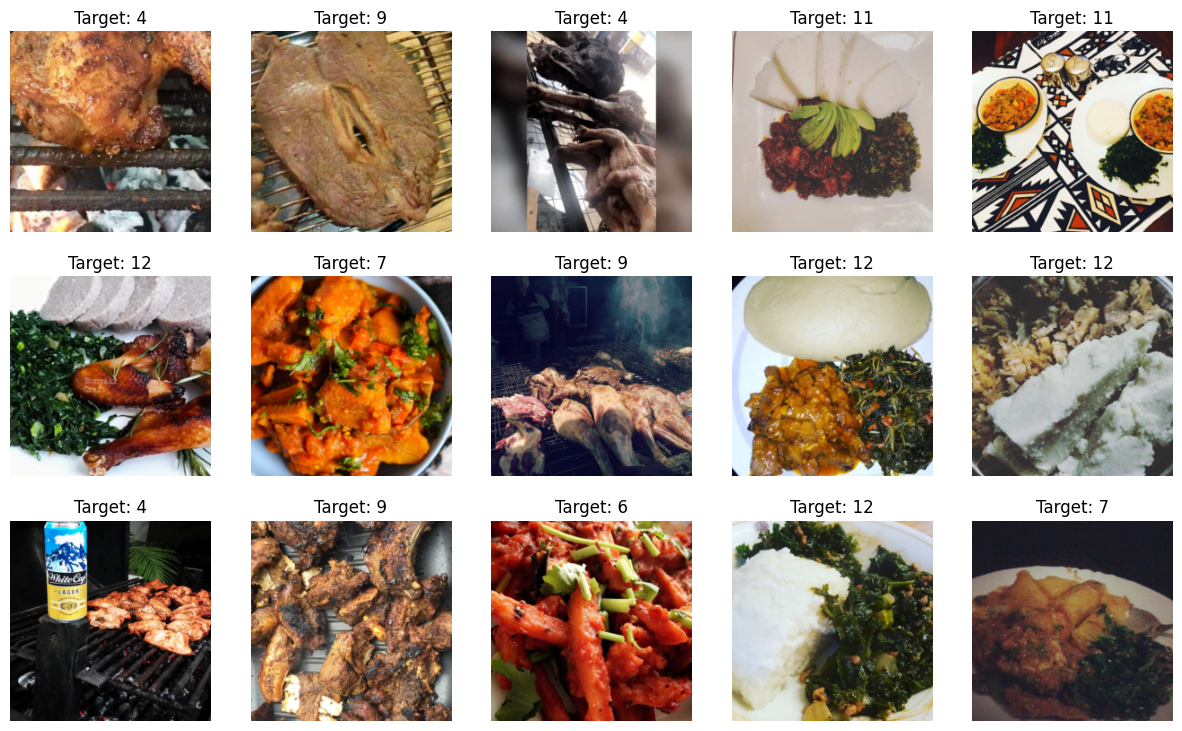

Mean: [0.56598745 0.46577866 0.36594808], Std: [0.28418615 0.28776548 0.29761534]
Number of samples of train dataset:  5228


In [13]:
train_dataset =  JsonClassificationDataset(json_file, type_data='train', dataset_number=0, transform=base_preprocess)

# dataloader with dataset
train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=15,
        shuffle=True,
        num_workers=2
    )


# view dataset
plot_images(train_loader)

# mean and std values of dataset
train_norm_parameter = train_dataset.calculate_mean_std_manual()

# max number of samples of dataset
train_len_param_dataset = len(train_dataset)
print('Number of samples of train dataset: ', train_len_param_dataset)

### <font style="color:blue">Create and show valid dataset</font>

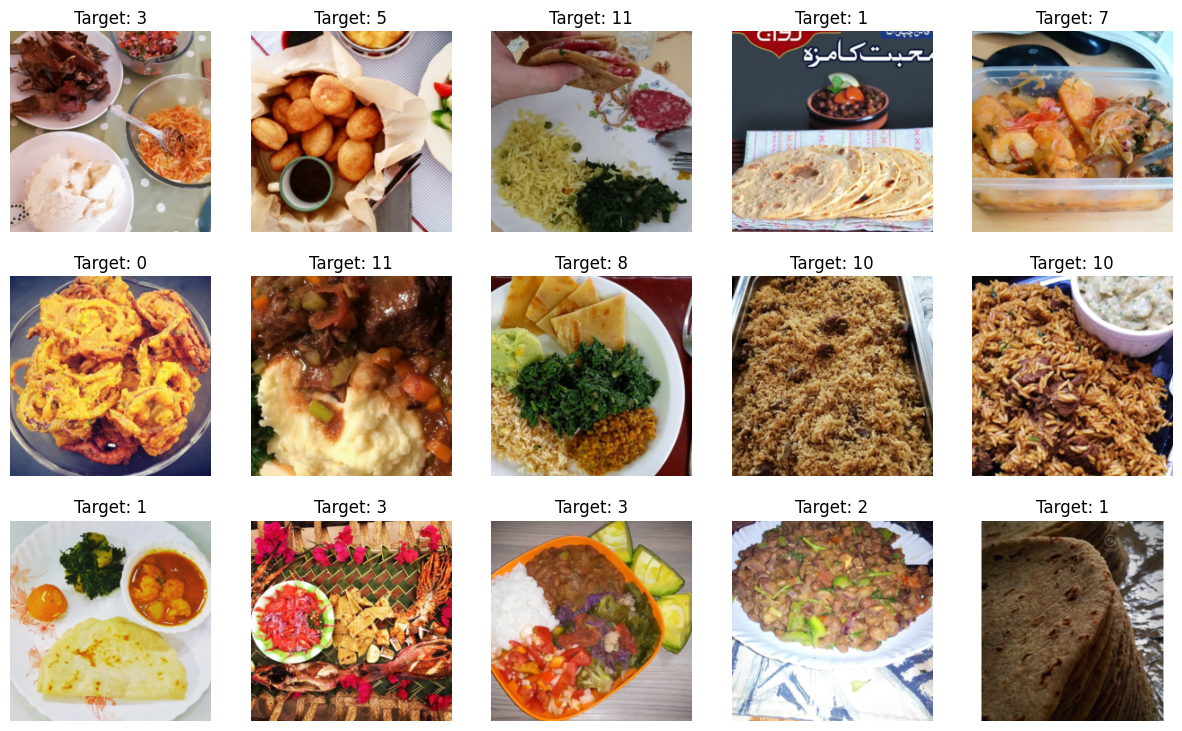

Mean: [0.57127492 0.46911317 0.36721358], Std: [0.28646336 0.28827506 0.29785785]
Number of samples of valid dataset:  1308


In [14]:
valid_dataset =  JsonClassificationDataset(json_file, type_data='valid', dataset_number=0, transform=base_preprocess)

# dataloader with dataset
valid_loader = torch.utils.data.DataLoader(
        valid_dataset,
        batch_size=15,
        shuffle=True,
        num_workers=2
    )

# view dataset
plot_images(valid_loader)

# mean and std values of dataset
valid_norm_parameter = valid_dataset.calculate_mean_std_manual()

# max number of samples of dataset
valid_len_param_dataset = len(valid_dataset)
print('Number of samples of valid dataset: ', valid_len_param_dataset)

### <font style="color:blue">Create and show test dataset</font>

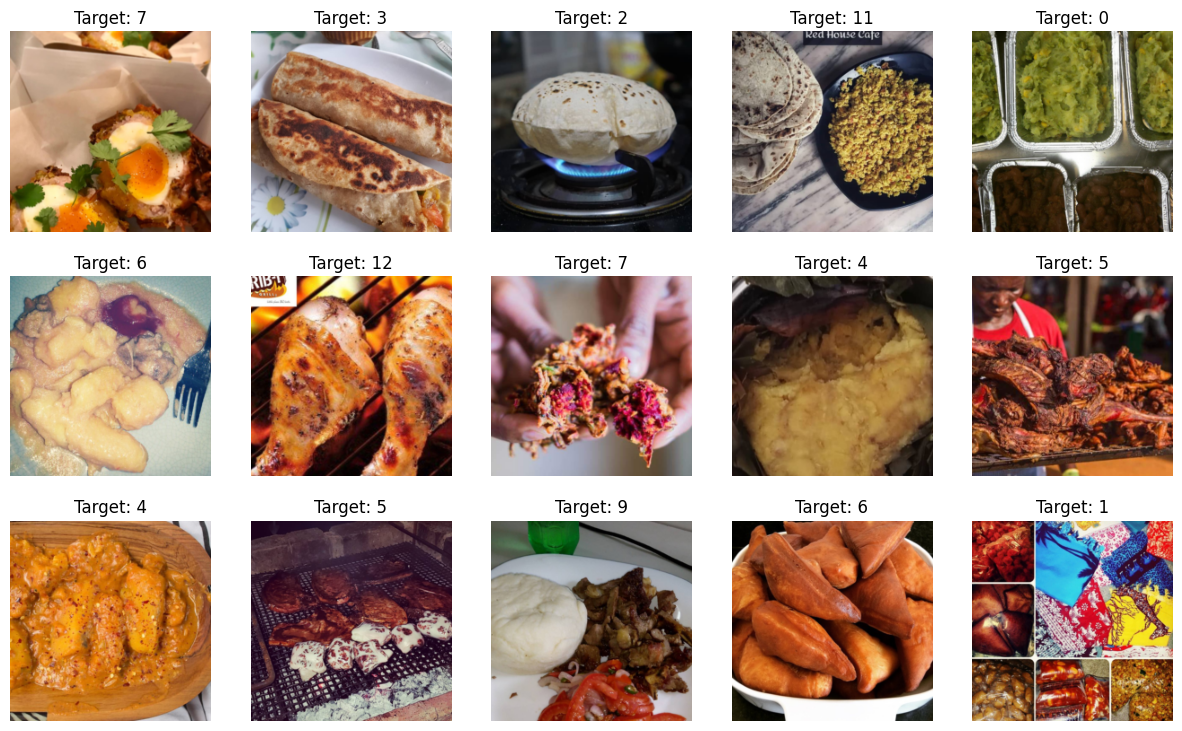

Mean: [0.56626071 0.46777388 0.36871068], Std: [0.2839786  0.28670355 0.29687443]
Number of samples of test dataset:  1638


In [15]:
test_dataset =  JsonClassificationDataset(json_file, type_data='test', dataset_number=0, transform=base_preprocess)

# dataloader with dataset
test_loader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=15,
        shuffle=True,
        num_workers=2
    )

# view dataset
plot_images(test_loader)

# mean and std values of dataset
test_norm_parameter = test_dataset.calculate_mean_std_manual()

# max number of samples of dataset
test_len_param_dataset = len(test_dataset)
print('Number of samples of test dataset: ', test_len_param_dataset)

### <font style="color:blue">Create function for get datasets for training</font>

In [16]:
def get_train_data(batch_size, writer, norm_parameter=None, json_file='datasets.json', num_workers=1, data_augmentation=False):
    
    if norm_parameter is not None:
        mean, std = norm_parameter
        # common transforms
        common_transforms = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=mean, std=std)
        ])
    else:
        # common transforms
        common_transforms = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor()
        ])
        
    # if data_augmentation is true 
    # data augmentation implementation
    if data_augmentation:
        train_transforms = transforms.Compose([
            transforms.RandomChoice([
                transforms.RandomHorizontalFlip(),
                transforms.RandomVerticalFlip(),
                transforms.RandomRotation(20, fill=(0,)),
                transforms.RandomPerspective(distortion_scale=0.6, p=1),
                transforms.ColorJitter(brightness=.5, hue=.3)
            ]),
            common_transforms
        ])
    # else do common transforms
    else:
        train_transforms = common_transforms

    # train dataloader
    train_dataset =  JsonClassificationDataset(json_file, type_data='train', dataset_number=0, transform=train_transforms)
    
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers
    )
    

    # test dataloader
    valid_dataset =  JsonClassificationDataset(json_file, type_data='valid', dataset_number=0, transform=common_transforms)
    
    test_loader = torch.utils.data.DataLoader(
        valid_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers
    )

   
 
    add_data_embedings = DataEmbedingVisualizer(valid_dataset, writer)
    add_data_embedings.update_charts()
    
    return train_loader, test_loader

### <font style="color:blue">Create function for get dataset for testing model</font>

In [17]:
def get_test_data(batch_size, norm_parameter=None, json_file='datasets.json', num_workers=1):
    
    if norm_parameter is not None:
        mean, std = norm_parameter
        # common transforms
        common_transforms = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=mean, std=std)
        ])
    else:
        # common transforms
        common_transforms = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor()
        ])
        
    
    # test dataloader
    test_dataset =  JsonClassificationDataset(json_file, type_data='test', dataset_number=0, transform=common_transforms)
    
    test_loader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers
    )
    return test_loader

## <font style="color:green">2. Configuration [5 Points]</font>

**Define your configuration here.**



### <font style="color:blue">Update configuration module of trainer</font>

We update setting of configuration classes by YAML file, see: [GitHub - configuration.py](https://github.com/RadimKozl/OpenCV_PyTorch_Project2/blob/main/trainer/configuration.py)

### <font style="color:blue">Download config file</font>

In [18]:
!wget "https://raw.githubusercontent.com/RadimKozl/OpenCV_PyTorch_Project2/refs/heads/main/config.yaml" -O /kaggle/working/config.yaml
!mv /kaggle/working/config.yaml /kaggle/working/config_experiment_resnet18.yaml

--2024-10-18 09:02:48--  https://raw.githubusercontent.com/RadimKozl/OpenCV_PyTorch_Project2/refs/heads/main/config.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 504 [text/plain]
Saving to: '/kaggle/working/config.yaml'

/kaggle/working/con 100%[===================>]     504  --.-KB/s    in 0s      

2024-10-18 09:02:49 (21.0 MB/s) - '/kaggle/working/config.yaml' saved [504/504]



### <font style="color:blue">Update config file</font>

In [19]:
config_ex_path_resnet18 = os.path.join('/kaggle','working','config_experiment_resnet18.yaml') # path of yaml file

# load yaml file
with open(config_ex_path_resnet18, 'r') as f:
    config = yaml.safe_load(f)

In [20]:
# set system config values
config['system']['seed'] = 21
config['system']['cudnn_benchmark_enabled'] = False
config['system']['cudnn_deterministic'] = False

# set dataset config values
config['dataset']['root_dir'] = "/kaggle/working/"
config['dataset']['json_file'] = "datasets.json"

# set dataloader config values
config['dataloader']['batch_size'] = 50
config['dataloader']['num_workers'] = 2
config['dataloader']['data_augmentation'] = True

# set optimizer config values
config['optimizer']['learning_rate'] = 0.001
config['optimizer']['momentum'] = 0.9
config['optimizer']['weight_decay'] = 0.0001
config['optimizer']['lr_step_milestones'] = [30, 40]
config['optimizer']['lr_gamma'] = 0.1

# set trainer config values
config['trainer']['model_dir'] = "checkpoints"
config['trainer']['model_saving_frequency'] = 1
config['trainer']['device'] = "cuda"
config['trainer']['epoch_num'] = 50
config['trainer']['log_interval'] = 5
config['trainer']['test_interval'] = 1
config['trainer']['progress_bar'] = True

In [21]:
with open(config_ex_path_resnet18, 'w') as f:
    yaml.dump(config, f)

### <font style="color:blue">Load Config data from file</font>

In [22]:
system_config, dataset_config, dataloader_config, optimizer_config, trainer_config = load_config_from_yaml(config_ex_path_resnet18)

## <font style="color:green">3. Evaluation Metric [10 Points]</font>

**Define methods or classes that will be used in model evaluation. For example, accuracy, f1-score etc.**

## <font style="color:green">4. Train and Validation [5 Points]</font>


**Write the methods or classes to be used for training and validation.**

## <font style="color:green">5. Model [5 Points]</font>

**Define your model in this section.**

**You are allowed to use any pre-trained model.**

In [23]:
def pretrained_resnet18(transfer_learning=True, fine_tune_from_layer3=False, num_class=13):
    """
    Load a pretrained ResNet18 model and configure it for transfer learning or fine-tuning.
    
    Args:
        transfer_learning (bool): Whether to freeze the entire model except the final layer.
        fine_tune_from_layer3 (bool): If True, fine-tune layers after Layer 3 (Layer 4 + FC layer).
        num_class (int): Number of output classes for the final layer.
        
    Returns:
        resnet: A modified ResNet18 model ready for transfer learning or fine-tuning.
    """
    # Loading the pretrained model
    resnet = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
    
    # Freeze the entire model if transfer_learning is True
    if transfer_learning:
        for param in resnet.parameters():
            param.requires_grad = False
    
    # If fine_tune_from_layer3 is True, we unlock layers after Layer 3 (ie Layer 4 and beyond)
    if fine_tune_from_layer3:
        for param in resnet.layer4.parameters():  # We unblock the Layer 4 weights
            param.requires_grad = True
    
    # Replacing the last fully connected layer by the number of classes
    last_layer_in = resnet.fc.in_features
    resnet.fc = nn.Linear(last_layer_in, num_class)
    
    # Unlocking the last layer (classifier)
    for param in resnet.fc.parameters():
        param.requires_grad = True

    return resnet

In [24]:
# model set for transfer learning
model_resnet18_TL = pretrained_resnet18(transfer_learning=True, fine_tune_from_layer3=False, num_class=13)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 186MB/s]


In [25]:
# model set for fine tuning
model_resnet18_FT = pretrained_resnet18(transfer_learning=True, fine_tune_from_layer3=False, num_class=13)

## <font style="color:green">6. Utils [5 Points]</font>

**Define those methods or classes, which have  not been covered in the above sections.**

## <font style="color:green">7. Experiment [5 Points]</font>

**Choose your optimizer and LR-scheduler and use the above methods and classes to train your model.**

In [26]:
class ExperimentTL:
    def __init__(
        self,
        system_config: configuration.SystemConfig = configuration.SystemConfig(),
        dataset_config: configuration.DatasetConfig = configuration.DatasetConfig(),
        dataloader_config: configuration.DataloaderConfig = configuration.DataloaderConfig(),
        optimizer_config: configuration.OptimizerConfig = configuration.OptimizerConfig()
    ):
        self.tb_writer = set_writer('log_resnet18/transfer_learning')
        self.loader_train, self.loader_test = get_train_data(
            batch_size=dataloader_config.batch_size,
            norm_parameter = train_norm_parameter,
            data_augmentation = True,
            num_workers=dataloader_config.num_workers,
            json_file='/kaggle/working/datasets.json',
            writer=self.tb_writer
        )
        
        setup_system(system_config)

        self.model = model_resnet18_FT
            
        self.loss_fn = nn.CrossEntropyLoss()
        self.metric_fn = AccuracyEstimator(topk=(1, ))
        self.optimizer = optim.SGD(
            self.model.parameters(),
            lr=optimizer_config.learning_rate,
            weight_decay=optimizer_config.weight_decay,
            momentum=optimizer_config.momentum
        )
        self.lr_scheduler = MultiStepLR(
            self.optimizer, milestones=optimizer_config.lr_step_milestones, gamma=optimizer_config.lr_gamma
        )
        
        self.visualizer = TensorBoardVisualizer(writer=self.tb_writer)

    def run(self, trainer_config: configuration.TrainerConfig) -> dict:

        device = torch.device(trainer_config.device)
        self.model = self.model.to(device)
        
        # add network graph with inputs info
        images, labels = next(iter(self.loader_test))
        images = images.to(trainer_config.device)
        add_network_graph_tensorboard = ModelVisualizer(self.model, images, self.tb_writer)
        add_network_graph_tensorboard.update_charts()
        
        self.loss_fn = self.loss_fn.to(device)

        model_trainer = Trainer(
            model=self.model,
            loader_train=self.loader_train,
            loader_test=self.loader_test,
            loss_fn=self.loss_fn,
            metric_fn=self.metric_fn,
            optimizer=self.optimizer,
            lr_scheduler=self.lr_scheduler,
            device=device,
            data_getter=itemgetter(0),
            target_getter=itemgetter(1),
            stage_progress=trainer_config.progress_bar,
            get_key_metric=itemgetter("top1"),
            visualizer=self.visualizer,
            model_saving_frequency=trainer_config.model_saving_frequency,
            save_dir=trainer_config.model_dir
        )

        model_trainer.register_hook("end_epoch", hooks.end_epoch_hook_classification)
        self.metrics = model_trainer.fit(trainer_config.epoch_num)
        return self.metrics

In [27]:
def main():
    '''Run the experiment
    '''
    # patch configs depending on cuda availability
    dataloader_config, trainer_config = patch_configs(epoch_num_to_set=15)
    dataset_config = configuration.DatasetConfig(root_dir="/kaggle/working/")
    experiment = ExperimentTL(dataset_config=dataset_config, dataloader_config=dataloader_config)
    results = experiment.run(trainer_config)

    return results

In [28]:
if __name__ == '__main__':
    main()

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/327 [00:05<?, ?it/s]

Process SpawnPoolWorker-8:
Process SpawnPoolWorker-9:
Process SpawnPoolWorker-7:
Process SpawnPoolWorker-3:
Process SpawnPoolWorker-4:
Process SpawnPoolWorker-5:
Process SpawnPoolWorker-2:
Process SpawnPoolWorker-1:
Process SpawnPoolWorker-6:
Process SpawnPoolWorker-10:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/opt/conda/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/opt/conda/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
  

KeyboardInterrupt: 

## <font style="color:green">8. TensorBoard Log [5 Points]</font>

**Share your TensorBoard scalars logs here You can also share (not mandatory) your GitHub link, if you have pushed this project in GitHub.**


<font style="color:red">Note:</font> In light of the recent shutdown of tensorboard.dev, we have updated the submission requirements for your project. Instead of sharing a tensorboard.dev link, you are now required to upload your generated TensorBoard event files directly onto the lab. As an alternative, you may also include a screenshot of your TensorBoard output within your Jupyter notebook. This adjustment ensures that your data visualization and model training efforts are thoroughly documented and accessible for evaluation.

pool = mp.Pool(processes = 10)
results_of_processes = [pool.apply_async(os.system, args=(cmd, ), callback = None )
                        for cmd in [
                        f"tensorboard --logdir ./logs_fashion_mnist --load_fast=false --host 0.0.0.0 --port 6006 &",
                        "/usr/local/bin/ngrok http 6006 &"
                        ]]## <font style="color:green">9. Kaggle Profile Link [50 Points]</font>

**Share your Kaggle profile link  with us here to score , points in  the competition.**

**For full points, you need a minimum accuracy of `75%` on the test data. If accuracy is less than `70%`, you gain  no points for this section.**


**Submit `submission.csv` (prediction for images in `test.csv`), in the `Submit Predictions` tab in Kaggle, to get evaluated for  this section.**